<a href="https://colab.research.google.com/github/tapasyamohan/MyRepository/blob/master/ProjectCyberBullying.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content.drive')

Drive already mounted at /content.drive; to attempt to forcibly remount, call drive.mount("/content.drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings("ignore")

Import nltk(natural language tool kit) and the 'stopwords' and 'punkt' packages

In [ ]:
import nltk
dir(nltk)

['ARLSTem',
 'ARLSTem2',
 'AbstractLazySequence',
 'AffixTagger',
 'AlignedSent',
 'Alignment',
 'AnnotationTask',
 'ApplicationExpression',
 'Assignment',
 'BigramAssocMeasures',
 'BigramCollocationFinder',
 'BigramTagger',
 'BinaryMaxentFeatureEncoding',
 'BlanklineTokenizer',
 'BllipParser',
 'BottomUpChartParser',
 'BottomUpLeftCornerChartParser',
 'BottomUpProbabilisticChartParser',
 'Boxer',
 'BrillTagger',
 'BrillTaggerTrainer',
 'CFG',
 'CRFTagger',
 'CfgReadingCommand',
 'ChartParser',
 'ChunkParserI',
 'ChunkScore',
 'Cistem',
 'ClassifierBasedPOSTagger',
 'ClassifierBasedTagger',
 'ClassifierI',
 'ConcordanceIndex',
 'ConditionalExponentialClassifier',
 'ConditionalFreqDist',
 'ConditionalProbDist',
 'ConditionalProbDistI',
 'ConfusionMatrix',
 'ContextIndex',
 'ContextTagger',
 'ContingencyMeasures',
 'CoreNLPDependencyParser',
 'CoreNLPParser',
 'CrossValidationProbDist',
 'DRS',
 'DecisionTreeClassifier',
 'DefaultTagger',
 'DependencyEvaluator',
 'DependencyGrammar',
 'D

In [ ]:
#The Punkt tokenizer is a pre-trained model that helps in splitting text into sentences or words.
#It is widely used for tokenization tasks
nltk.download("punkt")
nltk.download()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf

In [ ]:
#read dataset
cb=pd.read_json('/content.drive/MyDrive/CyberBullyingDataset.json')
pd.set_option("display.max_rows",None)

In [ ]:
#converting the .json file into dataframe for efficient analysis
tweets = pd.DataFrame(cb)

EDA-Exploratory Data Analysis

In [ ]:
tweets.head(5)

content  \
0                             Get fucking real dude.   
1   She is as dirty as they come  and that crook ...   
2   why did you fuck it up. I could do it all day...   
3   Dude they dont finish enclosing the fucking s...   
4   WTF are you talking about Men? No men thats n...   

                      annotation  extras  
0  {'notes': '', 'label': ['1']}     NaN  
1  {'notes': '', 'label': ['1']}     NaN  
2  {'notes': '', 'label': ['1']}     NaN  
3  {'notes': '', 'label': ['1']}     NaN  
4  {'notes': '', 'label': ['1']}     NaN

In [ ]:
tweets.tail(5)

content  \
19996    I dont. But what is complaining about it goi...   
19997   Bahah  yeah i&;m totally just gonna&; get pis...   
19998       hahahahaha >:) im evil mwahahahahahahahahaha   
19999            What&;s something unique about Ohio? :)   
20000              Who is the biggest gossiper you know?   

                          annotation  extras  
19996  {'notes': '', 'label': ['0']}     NaN  
19997  {'notes': '', 'label': ['0']}     NaN  
19998  {'notes': '', 'label': ['0']}     NaN  
19999  {'notes': '', 'label': ['0']}     NaN  
20000  {'notes': '', 'label': ['0']}     NaN

In [ ]:
tweets.shape

(20001, 3)

The dataset has 20001 items of which 20001 items have been manually labeled.

The labels are divided into following 2 categories:

1 (Cyber-Aggressive)
0 (Non Cyber-Aggressive)

In [ ]:
tweets.columns

Index(['content', 'annotation', 'extras'], dtype='object')

In [ ]:
tweets.drop(['extras'],axis = 1,inplace = True)
tweets

content  \
0                                 Get fucking real dude.   
1       She is as dirty as they come  and that crook ...   
2       why did you fuck it up. I could do it all day...   
3       Dude they dont finish enclosing the fucking s...   
4       WTF are you talking about Men? No men thats n...   
5      Ill save you the trouble sister. Here comes a ...   
6       Im dead serious.Real athletes never cheat don...   
7      ...go absolutely insane.hate to be the bearer ...   
8      Lmao  im watching the same thing ahaha. The ga...   
9      LOL  no he said  What do you call a jail cell ...   
10     truth on both counts that guy is an ass  and t...   
11                                     Shakespeare nerd!   
12                           you are SUCH a fucking dork   
13                                Heh. Fuck 'em WHERE?!?   
14                    damn it i totally forgot that one!   
15          wow  damn I would have been pissed @ that...   
16         nigga u geigh lmao! fuck yo finals beeeeeitch   
17                                         that sucks :(   
18     read that this morning. my fav is how they jus...   
19           Unibroue 17 !!!! Another damn good Unibroue   
20     damn your evil 60 minute IPA beckoning me from...   
21     It did  then my fucking dad turned it off. I j...   
22                   it pretty much is a fuck you card..   
23                            that karma is a bitch  HUH   
24        don't get too fat or you'll turn into a boomer   
25     the hormones are worse for guys.  I cant tell ...   
26     except for joe jonas the ass munch who broke u...   
27     man that rly sucks. I for 1 am positive that a...   
28     hard to kick ass yourself with slippers on?  O...   
29     Thats pretty damn awesome! Very smart :) @Aaro...   
30     freak'n awesome. so far loving 4.5. the browse...   
31                             Damn  that sounds good...   
32     they should have a wii loser..that way you can...   
33      @markmancao haha. i love it! gay nights for all!   
34              that's awesome! you're pretty damn good!   
35     Faggoty fag fag. Gay secks man blowjob. Settle...   
36               Right. That wouldn't be creepy as fuck.   
37                            HOLY SHIT. Fuck that band.   
38                                              Gay fag.   
39     oh ok it's the dick-in-a-box guys  that explai...   
40     *falls off of bed laughing fabulous ass off* D...   
41     and @justlikeanovel: *raises hand rather gaily...   
42      oh man. the malls are a mess  it grosses me o...   
43     where'd ya put it? o btw: "kick ass quote Copy...   
44     It sucks to be done with exams n still be @ Ma...   
45                          Epic WINS for Fuck City&lt;3   
46     Has it snowed where you are?? I miss the damn ...   
47      aren't you just super special.  I will not kn...   
48                     fuck yes.  I hate them at work...   
49     Holy ass hell balls!!!  $260 for premium????  ...   
50     but seriously...  WHY THE HELL ARE YOU STILL O...   
51     damn. Don't want to visit a country that doesn...   
52     I've never been to New York  and Peyton was an...   
53                        damn.  did you buy bitchy too?   
54                  then by all means  bitch away! haha.   
55     sucks that ppl will do anything to make a buck...   
56     Let that pussy freeze. Rotten bitey little bas...   
57     Dood! You just justified your MBA. I pity the ...   
58     hehehe. mine pleasure. Btw I too so loves it  ...   
59     I've only lived a quarter of my life and no cr...   
60     imagine a building. not any building...a fucki...   
61               Ugh  twitter stop it  you fucking slut.   
62     HAHAHAHAHAHAHAHAHAHAHAHAHA (eww now thats fuck...   
63     cute video lexi u hve some of the of the werid...   
64              Fuck the pics! @giove_dea WE WANT VIDS!!   
65         Hard to play because it is damn fucking awful   
66     you got that right! Pe

In [ ]:
tweets.columns

Index(['content', 'annotation'], dtype='object')

In [ ]:
print(tweets['annotation'].head())

0    {'notes': '', 'label': ['1']}
1    {'notes': '', 'label': ['1']}
2    {'notes': '', 'label': ['1']}
3    {'notes': '', 'label': ['1']}
4    {'notes': '', 'label': ['1']}
Name: annotation, dtype: object


In [ ]:
# Extract the 'label' value from the annotation column
tweets['annotation'] = tweets['annotation'].apply(lambda x: x['label'][0] if 'label' in x else None)

# Display the updated DataFrame
print(tweets)

                                                 content annotation
0                                 Get fucking real dude.          1
1       She is as dirty as they come  and that crook ...          1
2       why did you fuck it up. I could do it all day...          1
3       Dude they dont finish enclosing the fucking s...          1
4       WTF are you talking about Men? No men thats n...          1
5      Ill save you the trouble sister. Here comes a ...          1
6       Im dead serious.Real athletes never cheat don...          1
7      ...go absolutely insane.hate to be the bearer ...          1
8      Lmao  im watching the same thing ahaha. The ga...          1
9      LOL  no he said  What do you call a jail cell ...          1
10     truth on both counts that guy is an ass  and t...          1
11                                     Shakespeare nerd!          1
12                           you are SUCH a fucking dork          1
13                                Heh. Fuck 'em 

In [ ]:
tweets.head(5)

content annotation
0                             Get fucking real dude.          1
1   She is as dirty as they come  and that crook ...          1
2   why did you fuck it up. I could do it all day...          1
3   Dude they dont finish enclosing the fucking s...          1
4   WTF are you talking about Men? No men thats n...          1

In [ ]:
tweets['annotation'].value_counts()

annotation
0    12179
1     7822
Name: count, dtype: int64

DATA VISUALIZATION


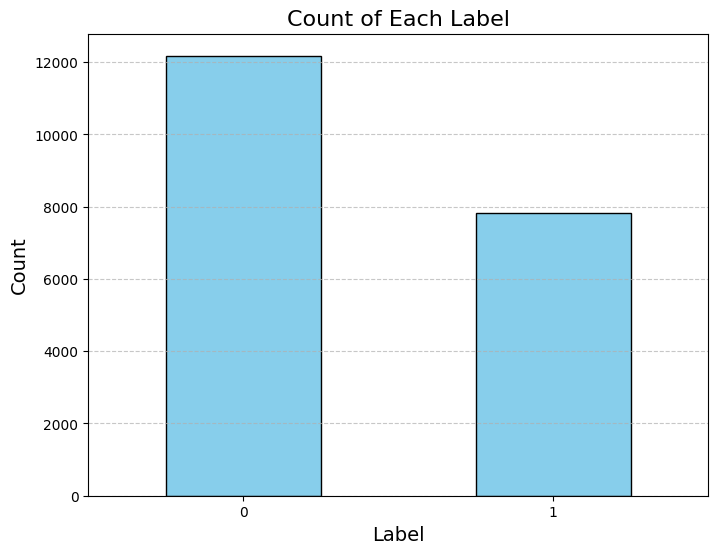

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each label
label_counts = tweets['annotation'].value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title("Count of Each Label", fontsize=16)
plt.xlabel("Label", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


TEXT CLEANING

In [ ]:
#importing regular expression
import re

# Define a function for text cleaning
def clean_text(text):
    # 1. Remove Punctuation and Special Characters
    text_no_punctuation = re.sub(r'[^\w\s]', '', text)

    # 2. Lowercasing
    text_lowercase = text_no_punctuation.lower()

    # 3. Remove Numbers
    text_no_numbers = re.sub(r'\d+', '', text_lowercase)

    # 4. Remove Whitespace (Extra spaces, tabs, and newlines)
    text_cleaned = re.sub(r'\s+', ' ', text_no_numbers).strip()

    return text_cleaned

# Apply the clean_content function to the 'content' column
tweets['cleaned_content'] = tweets['content'].apply(clean_text)

# Display the cleaned dataset
print(tweets['cleaned_content'].head())

0                                get fucking real dude
1    she is as dirty as they come and that crook re...
2    why did you fuck it up i could do it all day t...
3    dude they dont finish enclosing the fucking sh...
4    wtf are you talking about men no men thats not...
Name: cleaned_content, dtype: object


In [ ]:
tweets.columns

Index(['content', 'annotation', 'cleaned_content'], dtype='object')

In [ ]:
tweets.head(5)

content annotation  \
0                             Get fucking real dude.          1   
1   She is as dirty as they come  and that crook ...          1   
2   why did you fuck it up. I could do it all day...          1   
3   Dude they dont finish enclosing the fucking s...          1   
4   WTF are you talking about Men? No men thats n...          1   

                                     cleaned_content  
0                              get fucking real dude  
1  she is as dirty as they come and that crook re...  
2  why did you fuck it up i could do it all day t...  
3  dude they dont finish enclosing the fucking sh...  
4  wtf are you talking about men no men thats not...

TOKENIZATION


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
#Sentence tokenization (sent_tokenize): Splitting a paragraph into individual sentences.
#Word tokenization (word_tokenize): Splitting a sentence into individual words.
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

In [ ]:
from collections import Counter

# Tokenize and count word frequencies
all_words = [word for text in tweets['cleaned_content'] for word in word_tokenize(text)]
word_counts = Counter(all_words)

# Identify rare or frequent words
print("Most Common Words:", word_counts.most_common(5))
print("Least Common Words:", [word for word, count in word_counts.items() if count == 1])

Most Common Words: [('i', 9856), ('you', 6806), ('the', 6208), ('a', 5340), ('to', 5327)]
Least Common Words: ['medieval', 'trucks', 'windshield', 'presentyyyy', 'dudde', 'fuuck', 'shopped', 'tthan', 'givafuck', 'friendless', 'mouthy', 'slag', 'biatchh', 'uu', 'jking', 'flirts', 'itaposs', 'drty', 'chipmunk', 'dumbasssssss', 'hatein', 'iaposve', 'jizzed', 'tlkk', 'qurls', 'yurselff', 'scum', 'suckers', 'shoved', 'quotbadassquot', 'imeant', 'pussssssyss', 'fagggggg', 'harmony', 'flashpink', 'uglier', 'cameren', 'loomen', 'aujala', 'stuuupid', 'fuchkkk', 'wuld', 'jelous', 'smilemexxx', 'bimbo', 'dumping', 'xoxoashleyxo', 'kai', 'pumpn', 'dsz', 'bruh', 'bustd', 'ld', 'mmmasz', 'mosturizin', 'pcture', 'vagin', 'hzzzz', 'tl', 'nppy', 'htn', 'puzzie', 'ajula', 'herrr', 'cunts', 'chock', 'anonamis', 'pevert', 'twisted', 'gnna', 'fxk', 'nigggah', 'isz', 'circumsized', 'stupidddd', 'accountt', 'dhis', 'pelt', 'arenapost', 'shiiit', 'aliveum', 'ugler', 'grossest', 'ashleeee', 'amuse', 'brittany'

REMOVING STOP WORDS

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
# Define the function for stopword removal
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    text_without_stopwords = ' '.join([word for word in text.split() if word not in stop_words])
    return text_without_stopwords

#'tweets' is my DataFrame and i have a 'cleaned_content' column
tweets['cleaned_content_no_stopwords'] = tweets['cleaned_content'].apply(remove_stopwords)

# Display the result
print("Original Text (First few rows):")
print(tweets[['content', 'annotation']].head())  # Displaying content and annotation columns

print("\nText After Stopword Removal (First few rows):")
print(tweets[['cleaned_content', 'cleaned_content_no_stopwords']].head())  # Displaying cleaned content with stopword removal


Original Text (First few rows):
                                             content annotation
0                             Get fucking real dude.          1
1   She is as dirty as they come  and that crook ...          1
2   why did you fuck it up. I could do it all day...          1
3   Dude they dont finish enclosing the fucking s...          1
4   WTF are you talking about Men? No men thats n...          1

Text After Stopword Removal (First few rows):
                                     cleaned_content  \
0                              get fucking real dude   
1  she is as dirty as they come and that crook re...   
2  why did you fuck it up i could do it all day t...   
3  dude they dont finish enclosing the fucking sh...   
4  wtf are you talking about men no men thats not...   

                        cleaned_content_no_stopwords  
0                              get fucking real dude  
1  dirty come crook rengel dems fucking corrupt j...  
2  fuck could day lets hour ping la

In [ ]:
tweets.head(5)

content annotation  \
0                             Get fucking real dude.          1   
1   She is as dirty as they come  and that crook ...          1   
2   why did you fuck it up. I could do it all day...          1   
3   Dude they dont finish enclosing the fucking s...          1   
4   WTF are you talking about Men? No men thats n...          1   

                                     cleaned_content  \
0                              get fucking real dude   
1  she is as dirty as they come and that crook re...   
2  why did you fuck it up i could do it all day t...   
3  dude they dont finish enclosing the fucking sh...   
4  wtf are you talking about men no men thats not...   

                        cleaned_content_no_stopwords  
0                              get fucking real dude  
1  dirty come crook rengel dems fucking corrupt j...  
2  fuck could day lets hour ping later sched writ...  
3  dude dont finish enclosing fucking showers hat...  
4         wtf talking men men thats menage thats gay

STEMMING AND LEMMATIZATION

=>Stemming: Stemming is a technique where words are reduced to their base or root form by removing suffixes or prefixes. The resulting stem may not necessarily be a valid word on its own, but it can represent multiple related words. The process is relatively simple and involves applying predefined rules to trim common affixes. Stemming is generally faster than lemmatization due to its rule-based nature.
Example: Consider the following words: “running,” “runner,” and “runs.” After stemming, they would all be reduced to the common stem “run.”

Original Words: running, runner, runs

Stemmed Words: run, run, run

=>Lemmatization: Lemmatization, on the other hand, is a more sophisticated technique that transforms words to their base forms, known as lemmas, considering the word’s meaning and context. Unlike stemming, lemmatization ensures that the resulting lemma is a valid word, and it typically involves using a vocabulary or dictionary to map a word to its lemma.

Example: Let’s consider the same words as before: “running,” “runner,” and “runs.” After lemmatization, they will be reduced to different lemmas based on their respective parts of speech and context.

Original Words: running, runner, runs

Lemmatized Words: run, runner, run

In this example, “running” remains unchanged, as it is already in its base form (a verb in the present participle form). “Runner” remains “runner” since it is a noun, and the plural form “runs” becomes “run,” the base form of the verb.

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer

# Initialize the stemmer and lemmatizer
stemmer = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

# Define a function for stemming
def apply_stemming(text):
    # Tokenize the text into words
    words = word_tokenize(text)
    # Stem each word and join them back into a single string
    stemmed_text = ' '.join([stemmer.stem(word) for word in words])
    return stemmed_text

# Define a function for lemmatization
def apply_lemmatization(text):
    # Tokenize the text into words
    words = word_tokenize(text)
    # Lemmatize each word and join them back into a single string
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in words])
    return lemmatized_text

# Apply stemming to the 'cleaned_content_no_stopwords' column
tweets['stemmed_content'] = tweets['cleaned_content_no_stopwords'].apply(apply_stemming)

# Apply lemmatization to the 'cleaned_content_no_stopwords' column
tweets['lemmatized_content'] = tweets['cleaned_content_no_stopwords'].apply(apply_lemmatization)

# Display the result
print("Original Text (First few rows):")
print(tweets[['content', 'annotation']].head())  # Displaying content and annotation columns

print("\nText After Stemming (First few rows):")
print(tweets[['cleaned_content_no_stopwords', 'stemmed_content']].head())  # Displaying cleaned content with stemming

print("\nText After Lemmatization (First few rows):")
print(tweets[['cleaned_content_no_stopwords', 'lemmatized_content']].head())  # Displaying cleaned content with lemmatization


Original Text (First few rows):
                                             content annotation
0                             Get fucking real dude.          1
1   She is as dirty as they come  and that crook ...          1
2   why did you fuck it up. I could do it all day...          1
3   Dude they dont finish enclosing the fucking s...          1
4   WTF are you talking about Men? No men thats n...          1

Text After Stemming (First few rows):
                        cleaned_content_no_stopwords  \
0                              get fucking real dude   
1  dirty come crook rengel dems fucking corrupt j...   
2  fuck could day lets hour ping later sched writ...   
3  dude dont finish enclosing fucking showers hat...   
4         wtf talking men men thats menage thats gay   

                                     stemmed_content  
0                                  get fuck real dud  
1  dirty com crook rengel dem fuck corrupt jok ma...  
2   fuck could day let hour ping lat sched 

In [ ]:
tweets.head(5)

content annotation  \
0                             Get fucking real dude.          1   
1   She is as dirty as they come  and that crook ...          1   
2   why did you fuck it up. I could do it all day...          1   
3   Dude they dont finish enclosing the fucking s...          1   
4   WTF are you talking about Men? No men thats n...          1   

                                     cleaned_content  \
0                              get fucking real dude   
1  she is as dirty as they come and that crook re...   
2  why did you fuck it up i could do it all day t...   
3  dude they dont finish enclosing the fucking sh...   
4  wtf are you talking about men no men thats not...   

                        cleaned_content_no_stopwords  \
0                              get fucking real dude   
1  dirty come crook rengel dems fucking corrupt j...   
2  fuck could day lets hour ping later sched writ...   
3  dude dont finish enclosing fucking showers hat...   
4         wtf talking men men thats menage thats gay   

                                     stemmed_content  \
0                                  get fuck real dud   
1  dirty com crook rengel dem fuck corrupt jok ma...   
2   fuck could day let hour ping lat sched writ book   
3  dud dont fin enclos fuck show hat half ass job...   
4                 wtf talk men men that men that gay   

                                  lemmatized_content  
0                              get fucking real dude  
1  dirty come crook rengel dems fucking corrupt j...  
2  fuck could day let hour ping later sched writi...  
3  dude dont finish enclosing fucking shower hate...  
4         wtf talking men men thats menage thats gay

REMOVING URLs, HTML TAGS AND EMOJIS

In [ ]:
!pip install emoji

In [ ]:
import re
import emoji

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove emojis
    text = emoji.replace_emoji(text, replace='')
    return text

# Apply the cleaning function to the 'cleaned_content' column in the tweets dataset
tweets['cleaned_content'] = tweets['cleaned_content'].apply(clean_text)

In [ ]:
tweets.columns

Index(['content', 'annotation', 'cleaned_content',
       'cleaned_content_no_stopwords', 'stemmed_content',
       'lemmatized_content'],
      dtype='object')

In [ ]:
tweets.head(5)

content annotation  \
0                             Get fucking real dude.          1   
1   She is as dirty as they come  and that crook ...          1   
2   why did you fuck it up. I could do it all day...          1   
3   Dude they dont finish enclosing the fucking s...          1   
4   WTF are you talking about Men? No men thats n...          1   

                                     cleaned_content  \
0                              get fucking real dude   
1  she is as dirty as they come and that crook re...   
2  why did you fuck it up i could do it all day t...   
3  dude they dont finish enclosing the fucking sh...   
4  wtf are you talking about men no men thats not...   

                        cleaned_content_no_stopwords  \
0                              get fucking real dude   
1  dirty come crook rengel dems fucking corrupt j...   
2  fuck could day lets hour ping later sched writ...   
3  dude dont finish enclosing fucking showers hat...   
4         wtf talking men men thats menage thats gay   

                                     stemmed_content  \
0                                  get fuck real dud   
1  dirty com crook rengel dem fuck corrupt jok ma...   
2   fuck could day let hour ping lat sched writ book   
3  dud dont fin enclos fuck show hat half ass job...   
4                 wtf talk men men that men that gay   

                                  lemmatized_content  
0                              get fucking real dude  
1  dirty come crook rengel dems fucking corrupt j...  
2  fuck could day let hour ping later sched writi...  
3  dude dont finish enclosing fucking shower hate...  
4         wtf talking men men thats menage thats gay

HANDLING CONTRACTIONS

Expands contracted forms to their full version (e.g., "don't" → "do not").

In [ ]:
!pip install contractions


In [ ]:
from contractions import fix

# Function to expand contractions
def expand_contractions(text):
    return fix(text)

# Apply the function to the 'cleaned_content' column in the dataset
tweets['cleaned_content'] = tweets['cleaned_content'].apply(expand_contractions)

In [ ]:
# Display a few rows to verify the changes
tweets.head(5)

content annotation  \
0                             Get fucking real dude.          1   
1   She is as dirty as they come  and that crook ...          1   
2   why did you fuck it up. I could do it all day...          1   
3   Dude they dont finish enclosing the fucking s...          1   
4   WTF are you talking about Men? No men thats n...          1   

                                     cleaned_content  \
0                              get fucking real dude   
1  she is as dirty as they come and that crook re...   
2  why did you fuck it up i could do it all day t...   
3  dude they do not finish enclosing the fucking ...   
4  wtf are you talking about men no men that is n...   

                        cleaned_content_no_stopwords  \
0                              get fucking real dude   
1  dirty come crook rengel dems fucking corrupt j...   
2  fuck could day lets hour ping later sched writ...   
3  dude dont finish enclosing fucking showers hat...   
4         wtf talking men men thats menage thats gay   

                                     stemmed_content  \
0                                  get fuck real dud   
1  dirty com crook rengel dem fuck corrupt jok ma...   
2   fuck could day let hour ping lat sched writ book   
3  dud dont fin enclos fuck show hat half ass job...   
4                 wtf talk men men that men that gay   

                                  lemmatized_content  
0                              get fucking real dude  
1  dirty come crook rengel dems fucking corrupt j...  
2  fuck could day let hour ping later sched writi...  
3  dude dont finish enclosing fucking shower hate...  
4         wtf talking men men thats menage thats gay

HANDLING NEGATIONS


Ensures negations are preserved and interpreted correctly (e.g., "not good" → "negative sentiment").

In [ ]:
import re

def handle_negations(text):
    # List of negation words
    negations = r"\b(?:no|not|never|none|n't|cannot|without|nothing|neither|nowhere|nobody)\b"
    # Regex to capture negated phrases (up to 3 words after negation)
    pattern = re.compile(rf"({negations})\s+(\w+)", re.IGNORECASE)

    # Replace spaces between negation and following word with an underscore
    text = re.sub(pattern, lambda m: f"{m.group(1)}_{m.group(2)}", text)
    return text

# Apply to the 'cleaned_content' column in the dataset
tweets['cleaned_content'] = tweets['cleaned_content'].apply(handle_negations)

In [ ]:
tweets.head(5)

content annotation  \
0                             Get fucking real dude.          1   
1   She is as dirty as they come  and that crook ...          1   
2   why did you fuck it up. I could do it all day...          1   
3   Dude they dont finish enclosing the fucking s...          1   
4   WTF are you talking about Men? No men thats n...          1   

                                     cleaned_content  \
0                              get fucking real dude   
1  she is as dirty as they come and that crook re...   
2  why did you fuck it up i could do it all day t...   
3  dude they do not_finish enclosing the fucking ...   
4  wtf are you talking about men no_men that is n...   

                        cleaned_content_no_stopwords  \
0                              get fucking real dude   
1  dirty come crook rengel dems fucking corrupt j...   
2  fuck could day lets hour ping later sched writ...   
3  dude dont finish enclosing fucking showers hat...   
4         wtf talking men men thats menage thats gay   

                                     stemmed_content  \
0                                  get fuck real dud   
1  dirty com crook rengel dem fuck corrupt jok ma...   
2   fuck could day let hour ping lat sched writ book   
3  dud dont fin enclos fuck show hat half ass job...   
4                 wtf talk men men that men that gay   

                                  lemmatized_content  
0                              get fucking real dude  
1  dirty come crook rengel dems fucking corrupt j...  
2  fuck could day let hour ping later sched writi...  
3  dude dont finish enclosing fucking shower hate...  
4         wtf talking men men thats menage thats gay

TEXT NORMALIZATION

Corrects typos or slang (e.g., "u" → "you", "btw" → "by the way").
Converts different formats to a standard format (e.g., "$10" → "10 dollars").

In [ ]:
import re

# Dictionary for normalizing slang/typos
normalization_dict = {
    "u": "you",
    "btw": "by the way",
    "omg": "oh my god",
    "idk": "I don't know",
    "lol": "laugh out loud",
    "brb": "be right back",
    "gr8": "great",
    "$10": "10 dollars",
    "wtf": "what the fuck",
    "thx": "thanks",
    "plz": "please",
    "jk": "just kidding",
    "u suck": "you are bad",
    "btch": "bitch",
    "ahole": "asshole",
    "noob": "newbie",
    "loser": "loser",
    "dumbass": "stupid person",
    "idiot": "foolish person",
    "moron": "stupid person",
    "jerk": "mean person",
    "trash": "useless person",
    "ugly": "not attractive",
    "fat": "overweight",
    "stfu": "shut the fuck up",
    "gtfo": "get the fuck out",
    "fml": "fuck my life",
    "omfg": "oh my fucking god",
}

def normalize_text(text):
    # Replace slang/typos using the normalization dictionary
    for key, value in normalization_dict.items():
        text = re.sub(rf'\b{re.escape(key)}\b', value, text, flags=re.IGNORECASE)
    return text

# Normalize before vectorizing
tweets['cleaned_content'] = tweets['cleaned_content'].apply(normalize_text)

MODEL TRAINING


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
# Extract text and labels
texts = tweets['cleaned_content']
labels = tweets['annotation']

In [ ]:
# Convert text data into numerical format using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=1000,  # Limit to top 1000 features
    stop_words='english',  # Remove common stop words
    ngram_range=(1, 2)  # Use unigrams and bigrams
)

In [ ]:
# Transform the text data into TF-IDF features
X = tfidf_vectorizer.fit_transform(texts)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

In [ ]:
# Print original class distribution
print("Original class distribution:", Counter(y_train))

Original class distribution: Counter({'0': 9755, '1': 6245})


In [ ]:
# Balancing the dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
# Print class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_train_smote))

Class distribution after SMOTE: Counter({'1': 9755, '0': 9755})


In [ ]:
# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100, criterion='gini')


In [ ]:
# Fit the model
rf_clf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [ ]:
# Predictions
y_pred = rf_clf.predict(X_test)

In [ ]:
# Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8565358660334916
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.80      0.87      2424
           1       0.75      0.94      0.84      1577

    accuracy                           0.86      4001
   macro avg       0.86      0.87      0.85      4001
weighted avg       0.88      0.86      0.86      4001

Confusion Matrix:
 [[1939  485]
 [  89 1488]]


CLASSIFYING A NEW SENTENCE

In [ ]:
# Function to classify a tweet
def classify_tweet(tweet, model, vectorizer):
    """
    Classifies a tweet as Cyber-Aggressive (1) or Non Cyber-Aggressive (0).

    Parameters:
    tweet (str): The tweet text to classify.
    model: The trained Random Forest model.
    vectorizer: The fitted TfidfVectorizer used for training.

    Returns:
    int: 1 for Cyber-Aggressive, 0 for Non Cyber-Aggressive.
    """
    # Normalize the input tweet
    tweet = normalize_text(tweet)

    # Preprocess the input tweet using the vectorizer
    tweet_vectorized = vectorizer.transform([tweet])

    # Predict the label
    prediction = model.predict(tweet_vectorized)

    return int(prediction[0])

# Example usage
new_tweet = "WTF are you talking about Men?"
label = classify_tweet(new_tweet, rf_clf, tfidf_vectorizer)

if label == 1:
    print("The tweet indicates Cyber-Aggressive behavior.")
else:
    print("The tweet indicates Non Cyber-Aggressive behavior.")

The tweet indicates Cyber-Aggressive behavior.
